<a href="https://colab.research.google.com/github/carbotton/ML_Notebooks/blob/main/intelligent_agents/Agente_de_Trading_Inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agente de Trading Inteligente

Consigna:
* Implementar un agente que aprenda a tomar decisiones de compra/venta en datos financieros simulados.
* Utilizar Q-learning para el componente de agentes inteligentes
* Aplicar modelos de clasificación/regresión para predecir tendencias del mercado
* Integrar validación cruzada y métricas de evaluación

# Dataset

https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset/data

From 1993 to april 2020.

In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")


100%|██████████| 522M/522M [00:05<00:00, 98.0MB/s]

Extracting files...


In [3]:
print("Path to dataset files:", path)
print(f'Data: {os.listdir(os.path.join(path, ""))}')
print(f'ETFS: {os.listdir(os.path.join(path, "etfs"))}')
print(f'Stocks: {os.listdir(os.path.join(path, "stocks"))}')

Path to dataset files: /root/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2
Data: ['stocks', 'symbols_valid_meta.csv', 'etfs']
ETFS: ['VLU.csv', 'RUSL.csv', 'FRDM.csv', 'IDMO.csv', 'DBEH.csv', 'FTXD.csv', 'VEGN.csv', 'OEUR.csv', 'HYGV.csv', 'EFAD.csv', 'FHK.csv', 'JPME.csv', 'DGRS.csv', 'YLCO.csv', 'FMAT.csv', 'PSP.csv', 'DVP.csv', 'INTF.csv', 'FXP.csv', 'SCIX.csv', 'USEP.csv', 'EPP.csv', 'LRNZ.csv', 'SZK.csv', 'PDEV.csv', 'ONLN.csv', 'FLMI.csv', 'FLHY.csv', 'PPDM.csv', 'PLC.csv', 'EWM.csv', 'BKF.csv', 'RWVG.csv', 'RWCD.csv', 'PEX.csv', 'RYT.csv', 'ETHO.csv', 'MJO.csv', 'FRI.csv', 'UJUL.csv', 'MDYG.csv', 'GXG.csv', 'PPMC.csv', 'UPRO.csv', 'IHF.csv', 'EWV.csv', 'VIDI.csv', 'FLJH.csv', 'SHM.csv', 'CFA.csv', 'REMX.csv', 'EWK.csv', 'SDY.csv', 'SPLV.csv', 'GIGB.csv', 'CURE.csv', 'XLK.csv', 'SDIV.csv', 'SPHB.csv', 'RTM.csv', 'PBDM.csv', 'IGV.csv', 'ARKQ.csv', 'FTCS.csv', 'TLDH.csv', 'COMT.csv', 'WLDR.csv', 'RNLC.csv', 'EWUS.csv', 'BWX.csv', 'SLVP.csv', 'CWS.csv', 'ZHOK

In [4]:
import pandas as pd

csv_file_symbols = os.path.join(path, "symbols_valid_meta.csv")
df_symbols = pd.read_csv(csv_file_symbols)
df_symbols.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [5]:
df_symbols.shape

(8049, 12)

In [6]:
df_symbols.describe()

,Round Lot Size
count,8049.000000
mean,99.942974
std,2.289194
min,1.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,100.000000


In [7]:
df_symbols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), object(11)
memory usage: 754.7+ KB


In [8]:
print(f"Symbol unique values: {df_symbols['Symbol'].nunique()}")

Symbol unique values: 8049


In [9]:
csv_file_etf_spy = os.path.join(path, "etfs/SPY.csv")
df_etf_spy = pd.read_csv(csv_file_etf_spy)
df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.299288,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500


In [10]:
df_etf_spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6838,2020-03-26,249.520004,262.799988,249.050003,261.200012,261.200012,257632800
6839,2020-03-27,253.270004,260.809998,251.050003,253.419998,253.419998,224341200
6840,2020-03-30,255.699997,262.429993,253.529999,261.649994,261.649994,171369500
6841,2020-03-31,260.559998,263.329987,256.220001,257.750000,257.750000,194881100
6842,2020-04-01,247.979996,257.660004,243.899994,246.149994,246.149994,188601200


Date - specifies trading date

Open - opening price

High - maximum price during the day

Low - minimum price during the day

Close - close price adjusted for splits

Adj Close - adjusted close price adjusted for both dividends and splits.

Volume - the number of shares that changed hands during a given day

In [11]:
print(df_etf_spy[['Close', 'Volume']].describe())

             Close        Volume
count  6843.000000  6.843000e+03
mean    138.561533  8.462732e+07
std      65.098071  9.785176e+07
min      43.406250  5.200000e+03
25%      98.384998  7.411650e+06
50%     126.050003  5.732670e+07
75%     164.059998  1.219094e+08
max     338.339996  8.710263e+08


# Q-Learning

Vamos a entrenar un agente para que sepa cuando comprar/vender/mantener sus acciones de SPY.

In [12]:
import numpy as np

# === DATOS DEL DATASET ===
n_stocks_available = 8049  # Todas las acciones en dataset

# === Q-LEARNING ACTIONS (decisiones del agente) ===
# Qué puede hacer el agente
n_actions = 3  # HOLD, BUY, SELL

# === ESTADOS ===
# Cada "situacion" del mercado tiene que representarse como un numero entero
# Hay que discretizar la información continua del CSV
# Vamos a tomar el precio al cerrar y el volumen.
n_states = 9  # 3 tendencias × 3 niveles de volumen

# === Q TABLE ===
Q_table = np.zeros((n_states, n_actions))

print(f"Estados posibles: {n_states}")
print(f"Acciones posibles: {n_actions}")
print(f"Q-table shape: {Q_table.shape}")

Estados posibles: 9
Acciones posibles: 3
Q-table shape: (9, 3)


In [13]:
def create_state_from_data(close_price, volume, previous_close):
    """
    Convierte datos continuos en un estado discreto (0-8) para Q-learning.

    Mapeo de estados:
    - Tendencia precio: 0=bajista(<-1%), 1=lateral(-1% a +1%), 2=alcista(>+1%)
    - Volumen: 0=bajo, 1=medio, 2=alto

    Fórmula: state = price_trend * 3 + volume_level
    Esto crea 9 estados únicos (3 tendencias × 3 volúmenes):
    Estados 0-2: Bajista + (Bajo,Medio,Alto volumen)
    Estados 3-5: Lateral + (Bajo,Medio,Alto volumen)
    Estados 6-8: Alcista + (Bajo,Medio,Alto volumen)

    El *3 es para que cada tendencia "ocupe" 3 espacios consecutivos.
    """

    # 1. Calcular tendencia del precio
    price_change = (close_price - previous_close) / previous_close

    if price_change > 0.01:  # subió más del 1%
        price_trend = 2  # alcista
    elif price_change < -0.01:  # bajó más del 1%
        price_trend = 0  # bajista
    else:
        price_trend = 1  # lateral

    # 2. Clasificar volumen (ajustar según tus datos)
    if volume > 800000:
        volume_level = 2  # alto
    elif volume > 400000:
        volume_level = 1  # medio
    else:
        volume_level = 0  # bajo

    # 3. Combinar en estado único
    state = price_trend * 3 + volume_level

    return state

# Probar la función con algunos datos
print("=== PRUEBA DE ESTADOS ===")
for i in range(1, 6):  # primeros 5 días
    current_close = df_etf_spy.iloc[i]['Close']
    current_volume = df_etf_spy.iloc[i]['Volume']
    previous_close = df_etf_spy.iloc[i-1]['Close']

    state = create_state_from_data(current_close, current_volume, previous_close)
    price_change = ((current_close - previous_close) / previous_close) * 100

    print(f"Día {i}: Close={current_close:.2f}, Volume={current_volume}, "
          f"Cambio={price_change:.2f}% → Estado={state}")

=== PRUEBA DE ESTADOS ===
Día 1: Close=44.25, Volume=480500, Cambio=0.71% → Estado=4
Día 2: Close=44.34, Volume=201300, Cambio=0.21% → Estado=3
Día 3: Close=44.81, Volume=529400, Cambio=1.06% → Estado=7
Día 4: Close=45.00, Volume=531500, Cambio=0.42% → Estado=4
Día 5: Close=44.97, Volume=492100, Cambio=-0.07% → Estado=4


=== DISTRIBUCIÓN DE ESTADOS ===
Estado 0 (Bajista, Bajo): 14 veces (0.2%)
Estado 1 (Bajista, Medio): 15 veces (0.2%)
Estado 2 (Bajista, Alto): 836 veces (12.2%)
Estado 3 (Lateral, Bajo): 536 veces (7.8%)
Estado 4 (Lateral, Medio): 227 veces (3.3%)
Estado 5 (Lateral, Alto): 4294 veces (62.8%)
Estado 6 (Alcista, Bajo): 30 veces (0.4%)
Estado 7 (Alcista, Medio): 24 veces (0.4%)
Estado 8 (Alcista, Alto): 866 veces (12.7%)


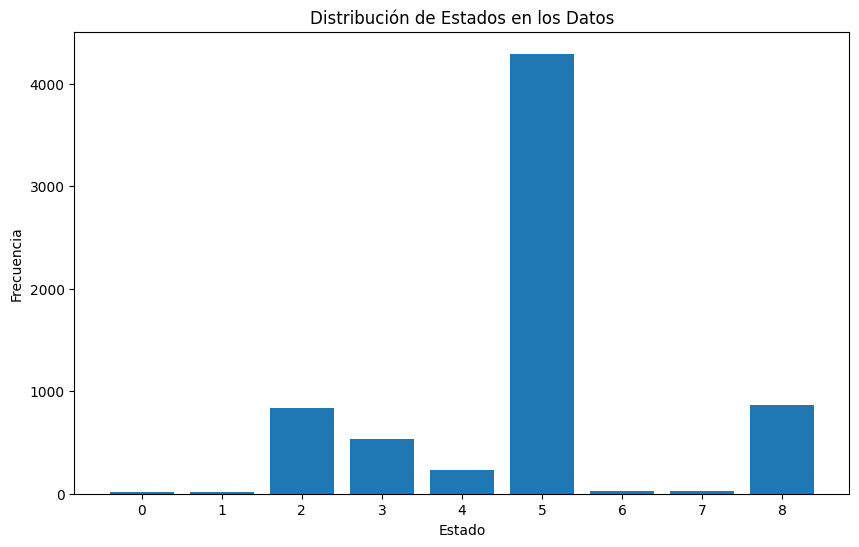

In [14]:
# Calcular todos los estados para ver su distribución
states = []
for i in range(1, len(df_etf_spy)):
    current_close = df_etf_spy.iloc[i]['Close']
    current_volume = df_etf_spy.iloc[i]['Volume']
    previous_close = df_etf_spy.iloc[i-1]['Close']

    state = create_state_from_data(current_close, current_volume, previous_close)
    states.append(state)

# Contar frecuencia de cada estado
state_counts = np.bincount(states, minlength=n_states)

print("=== DISTRIBUCIÓN DE ESTADOS ===")
for i in range(n_states):
    tendencia = ["Bajista", "Lateral", "Alcista"][i // 3]
    volumen = ["Bajo", "Medio", "Alto"][i % 3]
    print(f"Estado {i} ({tendencia}, {volumen}): {state_counts[i]} veces ({state_counts[i]/len(states)*100:.1f}%)")

# Visualizar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(n_states), state_counts)
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Estados en los Datos')
plt.xticks(range(n_states))
plt.show()

In [15]:
# Función para decodificar el estado
def decode_state(state):
    price_trend = state // 3
    volume_level = state % 3

    trend_names = ["Bajista", "Lateral", "Alcista"]
    volume_names = ["Bajo", "Medio", "Alto"]

    return f"{trend_names[price_trend]} + {volume_names[volume_level]}"

# Probar con algunos ejemplos
print("=== DECODIFICACIÓN DE ESTADOS ===")
for state in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    print(f"Estado {state}: {decode_state(state)}")

=== DECODIFICACIÓN DE ESTADOS ===
Estado 0: Bajista + Bajo
Estado 1: Bajista + Medio
Estado 2: Bajista + Alto
Estado 3: Lateral + Bajo
Estado 4: Lateral + Medio
Estado 5: Lateral + Alto
Estado 6: Alcista + Bajo
Estado 7: Alcista + Medio
Estado 8: Alcista + Alto


## Agente

In [16]:
class TradingAgent:
    def __init__(self, n_states=9, n_actions=3, learning_rate=0.1, epsilon=0.9, gamma=0.95):
        self.n_states = n_states
        self.n_actions = n_actions
        self.lr = learning_rate  # qué tan rápido aprende
        self.epsilon = epsilon   # probabilidad de exploración (90% inicial)
        self.gamma = gamma       # factor de descuento (importancia del futuro)

        # Q-table: la "memoria" del agente
        self.q_table = np.zeros((n_states, n_actions))

        # Estado del portafolio
        self.cash = 1000        # dinero inicial
        self.position = 0        # número de acciones que tengo
        self.buy_price = 0       # precio al que compré

    def choose_action(self, state):
        """Estrategia epsilon-greedy: explorar vs explotar"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)  # EXPLORAR: acción aleatoria
        else:
            return np.argmax(self.q_table[state])    # EXPLOTAR: mejor acción conocida

# Crear el agente
agent = TradingAgent()

print("=== AGENTE CREADO ===")
print(f"Q-table inicial shape: {agent.q_table.shape}")
print(f"Todos los valores son 0: {np.all(agent.q_table == 0)}. El agente no sabe nada, aprende desde cero.")
print(f"Capital inicial: ${agent.cash}")
print(f"Epsilon (exploración): {agent.epsilon}")

=== AGENTE CREADO ===
Q-table inicial shape: (9, 3)
Todos los valores son 0: True. El agente no sabe nada, aprende desde cero.
Capital inicial: $1000
Epsilon (exploración): 0.9


Un epsilon de 0.9 significa que el 90% del tiempo está explorando aleatoriamente, porque no tiene información, y el otro 10% explota su conocimiento.

Al principio no tiene conocimiento.

## Epsilon greedy

In [17]:
# Simular algunas decisiones del agente sin entrenar
print("=== DECISIONES DEL AGENTE SIN ENTRENAR ===")
print("(Como la Q-table está en ceros, todas las acciones son 'igual de buenas')")
print()

# Probar con algunos estados
test_states = [0, 4, 8]  # Bajista+Bajo, Lateral+Medio, Alcista+Alto

for state in test_states:
    print(f"Estado {state} ({decode_state(state)}):")

    # Tomar 5 decisiones para ver el patrón
    actions = []
    for i in range(5):
        action = agent.choose_action(state)
        actions.append(action)

    action_names = ["HOLD", "BUY", "SELL"]
    action_counts = [actions.count(i) for i in range(3)]

    print(f"  Decisiones: {[action_names[a] for a in actions]}")
    print(f"  Distribución: HOLD={action_counts[0]}, BUY={action_counts[1]}, SELL={action_counts[2]}")
    print()

=== DECISIONES DEL AGENTE SIN ENTRENAR ===
(Como la Q-table está en ceros, todas las acciones son 'igual de buenas')

Estado 0 (Bajista + Bajo):
  Decisiones: ['BUY', 'SELL', 'SELL', 'HOLD', 'SELL']
  Distribución: HOLD=1, BUY=1, SELL=3

Estado 4 (Lateral + Medio):
  Decisiones: ['SELL', 'SELL', 'BUY', 'SELL', 'HOLD']
  Distribución: HOLD=1, BUY=1, SELL=3

Estado 8 (Alcista + Alto):
  Decisiones: ['BUY', 'BUY', 'HOLD', 'HOLD', 'HOLD']
  Distribución: HOLD=3, BUY=2, SELL=0



En la celda anterior podemos ver lo que hace el agente antes de haber sido entrenado.

Por ejemplo para el estado 0, esta todo a la baja, pero decide VENDER. No tiene sentido.

El estado 4 pareceria que lo hizo bien, pero puede haber sido casualidad.

El estado 8 podria estar bien pero hay un BUY=1 que indica que podria querer comprar a la alza y eso es arriesgado.

## Sistema de recompensas

Para simplificar vamos a poner las siguientes reglas:

* Solo se puede comprar si NO tengo acciones (position=0)
* Solo puedo vender si ya tengo acciones (position>0)
* Si intento comprar ya teniendo acciones -> penalizacion
* Si intento vender sin tener acciones -> penalizacion

In [18]:
def calculate_reward(agent, action, current_price, next_price):
    """
    Calcula la recompensa basada en la acción tomada.

    Lógica:
    - BUY cuando no tengo posición: neutral (0)
    - SELL cuando tengo posición: % de ganancia/pérdida
    - HOLD: pequeña recompensa si la tendencia es correcta
    - Acciones inválidas: penalización (-1)
    """

    if action == 1:  # BUY
        if agent.position == 0:  # no tengo posición
            # Comprar con todo el dinero disponible
            shares_to_buy = agent.cash // current_price
            agent.position = shares_to_buy
            agent.cash -= shares_to_buy * current_price
            agent.buy_price = current_price
            reward = 0  # neutral por abrir posición
            action_result = f"COMPRADO {shares_to_buy} acciones a ${current_price:.2f}"
        else:
            reward = -1  # penalizar por intentar comprar cuando ya tengo
            action_result = "PENALIZADO: Ya tengo posición"

    elif action == 2:  # SELL
        if agent.position > 0:  # tengo posición
            # Vender todas las acciones
            profit = (current_price - agent.buy_price) * agent.position
            agent.cash += agent.position * current_price
            return_pct = (current_price - agent.buy_price) / agent.buy_price * 100
            reward = return_pct  # recompensa = % de retorno
            action_result = f"VENDIDO {agent.position} acciones. Profit: ${profit:.2f} ({return_pct:.1f}%)"
            agent.position = 0
            agent.buy_price = 0
        else:
            reward = -1  # penalizar por intentar vender sin posición
            action_result = "PENALIZADO: No tengo posición para vender"

    else:  # HOLD
        if agent.position > 0:
            # Recompensa pequeña basada en si el precio sube o baja
            price_change = (next_price - current_price) / current_price
            reward = price_change * 0.1  # 10% de la variación del precio
            unrealized = (current_price - agent.buy_price) / agent.buy_price * 100
            action_result = f"MANTENIDO. Ganancia no realizada: {unrealized:.1f}%"
        else:
            reward = -0.01  # pequeña penalización por no hacer nada
            action_result = "ESPERANDO sin posición"

    return reward, action_result

# Probar el sistema de recompensas
print("=== PRUEBA DEL SISTEMA DE RECOMPENSAS ===")

# Resetear agente para la prueba
agent.cash = 10000
agent.position = 0
agent.buy_price = 0

# Simular secuencia: BUY -> HOLD -> SELL
prices = [100, 105, 110]  # precio sube
actions = [1, 0, 2]       # BUY, HOLD, SELL
action_names = ["HOLD", "BUY", "SELL"]

for i, (price, action) in enumerate(zip(prices[:-1], actions)):
    next_price = prices[i+1]
    reward, result = calculate_reward(agent, action, price, next_price)

    print(f"Día {i+1}: {action_names[action]} a ${price} (siguiente: ${next_price})")
    print(f"  Resultado: {result}")
    print(f"  Recompensa: {reward:.3f}")
    print(f"  Cash: ${agent.cash:.2f}, Posición: {agent.position}")
    print()

=== PRUEBA DEL SISTEMA DE RECOMPENSAS ===
Día 1: BUY a $100 (siguiente: $105)
  Resultado: COMPRADO 100 acciones a $100.00
  Recompensa: 0.000
  Cash: $0.00, Posición: 100

Día 2: HOLD a $105 (siguiente: $110)
  Resultado: MANTENIDO. Ganancia no realizada: 5.0%
  Recompensa: 0.005
  Cash: $0.00, Posición: 100



## Actualizacion de la Q-table

In [19]:
def update_q_table(agent, state, action, reward, next_state):
    """
    Actualiza la Q-table usando la ecuación de Q-Learning.

    Fórmula: Q(s,a) = Q(s,a) + α * [R + γ * max(Q(s',a')) - Q(s,a)]

    Parámetros:
    - state: estado actual
    - action: acción tomada
    - reward: recompensa recibida
    - next_state: nuevo estado después de la acción
    """

    # Valor Q actual para esta combinación estado-acción
    current_q = agent.q_table[state, action]

    # Mejor valor Q posible en el siguiente estado
    next_max_q = np.max(agent.q_table[next_state])

    # Calcular nuevo valor Q usando la ecuación de Q-Learning
    new_q = current_q + agent.lr * (reward + agent.gamma * next_max_q - current_q)

    # Actualizar la Q-table
    agent.q_table[state, action] = new_q

    return new_q

# Agregar método a la clase TradingAgent
TradingAgent.update_q_table = lambda self, state, action, reward, next_state: update_q_table(self, state, action, reward, next_state)

print("=== PRUEBA DE ACTUALIZACIÓN Q-LEARNING ===")

# Simular una experiencia de aprendizaje
print("Situación: El agente compra en estado bajista y el precio sube")
print()

# Estado inicial de la Q-table
state = 0  # Bajista + Bajo
action = 1  # BUY
print(f"Q-value inicial Q({state}, BUY) = {agent.q_table[state, action]:.3f}")

# Simular que después de comprar, pasamos a un estado mejor
next_state = 3  # Bajista + Medio (precio subió un poco)
reward = 5.0    # Buena recompensa por comprar barato

# Actualizar Q-table
new_q = agent.update_q_table(state, action, reward, next_state)

print(f"Recompensa recibida: {reward}")
print(f"Q-value actualizado Q({state}, BUY) = {new_q:.3f}")
print()

# Mostrar el cambio
print("¡El agente aprendió que comprar en estado bajista es bueno!")
print(f"Cambio en Q-value: {new_q - 0:.3f}")

# Simular una mala experiencia
print("\n" + "="*50)
print("Situación: El agente compra en estado alcista y pierde dinero")

state = 8  # Alcista + Alto
action = 1  # BUY
print(f"Q-value inicial Q({state}, BUY) = {agent.q_table[state, action]:.3f}")

next_state = 5  # Alcista + Bajo (precio cayó mucho)
reward = -15.0  # Mala recompensa por comprar caro

new_q = agent.update_q_table(state, action, reward, next_state)

print(f"Recompensa recibida: {reward}")
print(f"Q-value actualizado Q({state}, BUY) = {new_q:.3f}")
print()
print("¡El agente aprendió que comprar en estado alcista es malo!")
print(f"Cambio en Q-value: {new_q - 0:.3f}")

=== PRUEBA DE ACTUALIZACIÓN Q-LEARNING ===
Situación: El agente compra en estado bajista y el precio sube

Q-value inicial Q(0, BUY) = 0.000
Recompensa recibida: 5.0
Q-value actualizado Q(0, BUY) = 0.500

¡El agente aprendió que comprar en estado bajista es bueno!
Cambio en Q-value: 0.500

Situación: El agente compra en estado alcista y pierde dinero
Q-value inicial Q(8, BUY) = 0.000
Recompensa recibida: -15.0
Q-value actualizado Q(8, BUY) = -1.500

¡El agente aprendió que comprar en estado alcista es malo!
Cambio en Q-value: -1.500


## Loop de entrenamiento completo

In [20]:
def train_agent(agent, df, n_episodes=100, decay_rate=0.99):
    """
    Entrena el agente usando Q-Learning con los datos históricos.

    Parámetros:
    - agent: instancia de TradingAgent
    - df: DataFrame con datos históricos (debe tener columns: Date, Close, Volume)
    - n_episodes: número de episodios de entrenamiento
    - decay_rate: tasa de decaimiento del epsilon (exploración -> explotación)
    """

    # Métricas para tracking
    episode_rewards = []
    episode_profits = []
    epsilon_history = []

    print(f"=== INICIANDO ENTRENAMIENTO ===")
    print(f"Episodios: {n_episodes}")
    print(f"Datos disponibles: {len(df)} días")
    print(f"Epsilon inicial: {agent.epsilon:.3f}")
    print()

    for episode in range(n_episodes):
        # Resetear agente para cada episodio
        agent.cash = 10000
        agent.position = 0
        agent.buy_price = 0

        total_reward = 0
        actions_taken = []

        # Recorrer los datos históricos (empezar desde día 1 para tener previous_close)
        for day in range(1, len(df) - 1):  # -1 para tener next_price

            # Obtener datos del día actual
            current_close = df.iloc[day]['Close']
            current_volume = df.iloc[day]['Volume']
            previous_close = df.iloc[day-1]['Close']
            next_close = df.iloc[day+1]['Close']

            # Crear estado actual
            current_state = create_state_from_data(current_close, current_volume, previous_close)

            # Agente elige acción
            action = agent.choose_action(current_state)
            actions_taken.append(action)

            # Calcular recompensa
            reward, action_result = calculate_reward(agent, action, current_close, next_close)
            total_reward += reward

            # Crear próximo estado (para Q-Learning)
            if day < len(df) - 2:  # asegurar que tenemos datos suficientes
                next_volume = df.iloc[day+1]['Volume']
                next_state = create_state_from_data(next_close, next_volume, current_close)
            else:
                next_state = current_state  # estado terminal

            # Actualizar Q-table
            agent.update_q_table(current_state, action, reward, next_state)

        # Calcular profit final del episodio
        final_portfolio_value = agent.cash + (agent.position * df.iloc[-1]['Close'])
        episode_profit = final_portfolio_value - 10000  # capital inicial

        # Guardar métricas
        episode_rewards.append(total_reward)
        episode_profits.append(episode_profit)
        epsilon_history.append(agent.epsilon)

        # Decay epsilon (menos exploración con el tiempo)
        agent.epsilon = max(0.01, agent.epsilon * decay_rate)  # mínimo 1%

        # Mostrar progreso cada 10 episodios
        if (episode + 1) % 10 == 0:
            avg_reward = np.mean(episode_rewards[-10:])
            avg_profit = np.mean(episode_profits[-10:])
            action_counts = [actions_taken.count(i) for i in range(3)]

            print(f"Episodio {episode+1:3d} | "
                  f"Epsilon: {agent.epsilon:.3f} | "
                  f"Reward promedio: {avg_reward:6.2f} | "
                  f"Profit promedio: ${avg_profit:7.2f} | "
                  f"Acciones: H={action_counts[0]} B={action_counts[1]} S={action_counts[2]}")

    print(f"\n=== ENTRENAMIENTO COMPLETADO ===")
    print(f"Epsilon final: {agent.epsilon:.3f}")
    print(f"Profit promedio últimos 10 episodios: ${np.mean(episode_profits[-10:]):.2f}")

    return episode_rewards, episode_profits, epsilon_history

# Función para evaluar el agente entrenado
def evaluate_agent(agent, df, verbose=True):
    """
    Evalúa el rendimiento del agente entrenado sin exploración (epsilon=0).
    """

    # Guardar epsilon original y ponerlo a 0 (sin exploración)
    original_epsilon = agent.epsilon
    agent.epsilon = 0

    # Resetear agente
    agent.cash = 10000
    agent.position = 0
    agent.buy_price = 0

    portfolio_values = [10000]  # valor inicial
    actions_taken = []
    trades = []  # registro de operaciones

    for day in range(1, len(df) - 1):
        current_close = df.iloc[day]['Close']
        current_volume = df.iloc[day]['Volume']
        previous_close = df.iloc[day-1]['Close']
        next_close = df.iloc[day+1]['Close']

        # Estado y acción
        current_state = create_state_from_data(current_close, current_volume, previous_close)
        action = agent.choose_action(current_state)  # epsilon=0, solo explotación
        actions_taken.append(action)

        # Ejecutar acción
        reward, action_result = calculate_reward(agent, action, current_close, next_close)

        # Registrar trades importantes
        if action == 1 and agent.position > 0:  # BUY exitoso
            trades.append(f"Día {day}: COMPRA a ${current_close:.2f}")
        elif action == 2 and agent.position == 0:  # SELL exitoso
            trades.append(f"Día {day}: VENTA a ${current_close:.2f}")

        # Calcular valor del portfolio
        portfolio_value = agent.cash + (agent.position * current_close)
        portfolio_values.append(portfolio_value)

    # Restaurar epsilon original
    agent.epsilon = original_epsilon

    # Métricas finales
    final_value = portfolio_values[-1]
    total_return = (final_value - 10000) / 10000 * 100
    max_value = max(portfolio_values)
    min_value = min(portfolio_values)

    # Buy & Hold benchmark
    buy_hold_return = (df.iloc[-1]['Close'] - df.iloc[1]['Close']) / df.iloc[1]['Close'] * 100

    if verbose:
        print(f"=== EVALUACIÓN DEL AGENTE ===")
        print(f"Capital inicial: $10,000")
        print(f"Capital final: ${final_value:.2f}")
        print(f"Retorno total: {total_return:.2f}%")
        print(f"Valor máximo: ${max_value:.2f}")
        print(f"Valor mínimo: ${min_value:.2f}")
        print(f"Buy & Hold: {buy_hold_return:.2f}%")
        print(f"Outperformance: {total_return - buy_hold_return:.2f}%")
        print(f"\nAcciones tomadas:")
        action_counts = [actions_taken.count(i) for i in range(3)]
        print(f"  HOLD: {action_counts[0]} ({action_counts[0]/len(actions_taken)*100:.1f}%)")
        print(f"  BUY:  {action_counts[1]} ({action_counts[1]/len(actions_taken)*100:.1f}%)")
        print(f"  SELL: {action_counts[2]} ({action_counts[2]/len(actions_taken)*100:.1f}%)")

        if trades:
            print(f"\nOperaciones principales:")
            for trade in trades[-5:]:  # últimas 5 operaciones
                print(f"  {trade}")

    return {
        'final_value': final_value,
        'total_return': total_return,
        'buy_hold_return': buy_hold_return,
        'portfolio_values': portfolio_values,
        'actions': actions_taken,
        'trades': trades
    }

# Función para visualizar resultados
def plot_training_results(episode_rewards, episode_profits, epsilon_history):
    """
    Visualiza los resultados del entrenamiento.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Recompensas por episodio
    axes[0,0].plot(episode_rewards)
    axes[0,0].set_title('Recompensas por Episodio')
    axes[0,0].set_xlabel('Episodio')
    axes[0,0].set_ylabel('Recompensa Total')
    axes[0,0].grid(True)

    # Profits por episodio
    axes[0,1].plot(episode_profits)
    axes[0,1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0,1].set_title('Profit por Episodio')
    axes[0,1].set_xlabel('Episodio')
    axes[0,1].set_ylabel('Profit ($)')
    axes[0,1].grid(True)

    # Epsilon decay
    axes[1,0].plot(epsilon_history)
    axes[1,0].set_title('Epsilon (Exploración) vs Tiempo')
    axes[1,0].set_xlabel('Episodio')
    axes[1,0].set_ylabel('Epsilon')
    axes[1,0].grid(True)

    # Promedio móvil de profits
    window = 10
    if len(episode_profits) >= window:
        moving_avg = np.convolve(episode_profits, np.ones(window)/window, mode='valid')
        axes[1,1].plot(range(window-1, len(episode_profits)), moving_avg)
        axes[1,1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
        axes[1,1].set_title(f'Profit Promedio Móvil ({window} episodios)')
        axes[1,1].set_xlabel('Episodio')
        axes[1,1].set_ylabel('Profit Promedio ($)')
        axes[1,1].grid(True)

    plt.tight_layout()
    plt.show()

def plot_portfolio_performance(results, df):
    """
    Visualiza el rendimiento del portfolio vs Buy & Hold.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Portfolio value vs tiempo
    days = range(len(results['portfolio_values']))
    ax1.plot(days, results['portfolio_values'], label='Agente Q-Learning', linewidth=2)

    # Buy & Hold comparison
    initial_price = df.iloc[1]['Close']
    buy_hold_values = [10000 * (df.iloc[i]['Close'] / initial_price) for i in range(1, len(df))]
    buy_hold_values = [10000] + buy_hold_values[:len(results['portfolio_values'])-1]

    ax1.plot(days, buy_hold_values, label='Buy & Hold', linewidth=2, alpha=0.7)
    ax1.axhline(y=10000, color='gray', linestyle='--', alpha=0.5, label='Capital Inicial')

    ax1.set_title('Rendimiento del Portfolio')
    ax1.set_xlabel('Días')
    ax1.set_ylabel('Valor del Portfolio ($)')
    ax1.legend()
    ax1.grid(True)

    # Precio de la acción
    ax2.plot(df.iloc[1:len(results['portfolio_values'])+1]['Close'], label='Precio SPY', color='black', alpha=0.7)
    ax2.set_title('Precio de SPY')
    ax2.set_xlabel('Días')
    ax2.set_ylabel('Precio ($)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

=== PREPARANDO ENTRENAMIENTO ===
=== INICIANDO ENTRENAMIENTO ===
Episodios: 50
Datos disponibles: 6843 días
Epsilon inicial: 0.900

Episodio  10 | Epsilon: 0.539 | Reward promedio: -1637.88 | Profit promedio: $13706.41 | Acciones: H=4108 B=1305 S=1428
Episodio  20 | Epsilon: 0.323 | Reward promedio: -976.93 | Profit promedio: $25504.25 | Acciones: H=5074 B=778 S=989
Episodio  30 | Epsilon: 0.193 | Reward promedio: -636.71 | Profit promedio: $9604.11 | Acciones: H=5757 B=463 S=621
Episodio  40 | Epsilon: 0.116 | Reward promedio: -389.79 | Profit promedio: $12609.97 | Acciones: H=6208 B=263 S=370
Episodio  50 | Epsilon: 0.069 | Reward promedio: -244.72 | Profit promedio: $14706.95 | Acciones: H=6361 B=179 S=301

=== ENTRENAMIENTO COMPLETADO ===
Epsilon final: 0.069
Profit promedio últimos 10 episodios: $14706.95


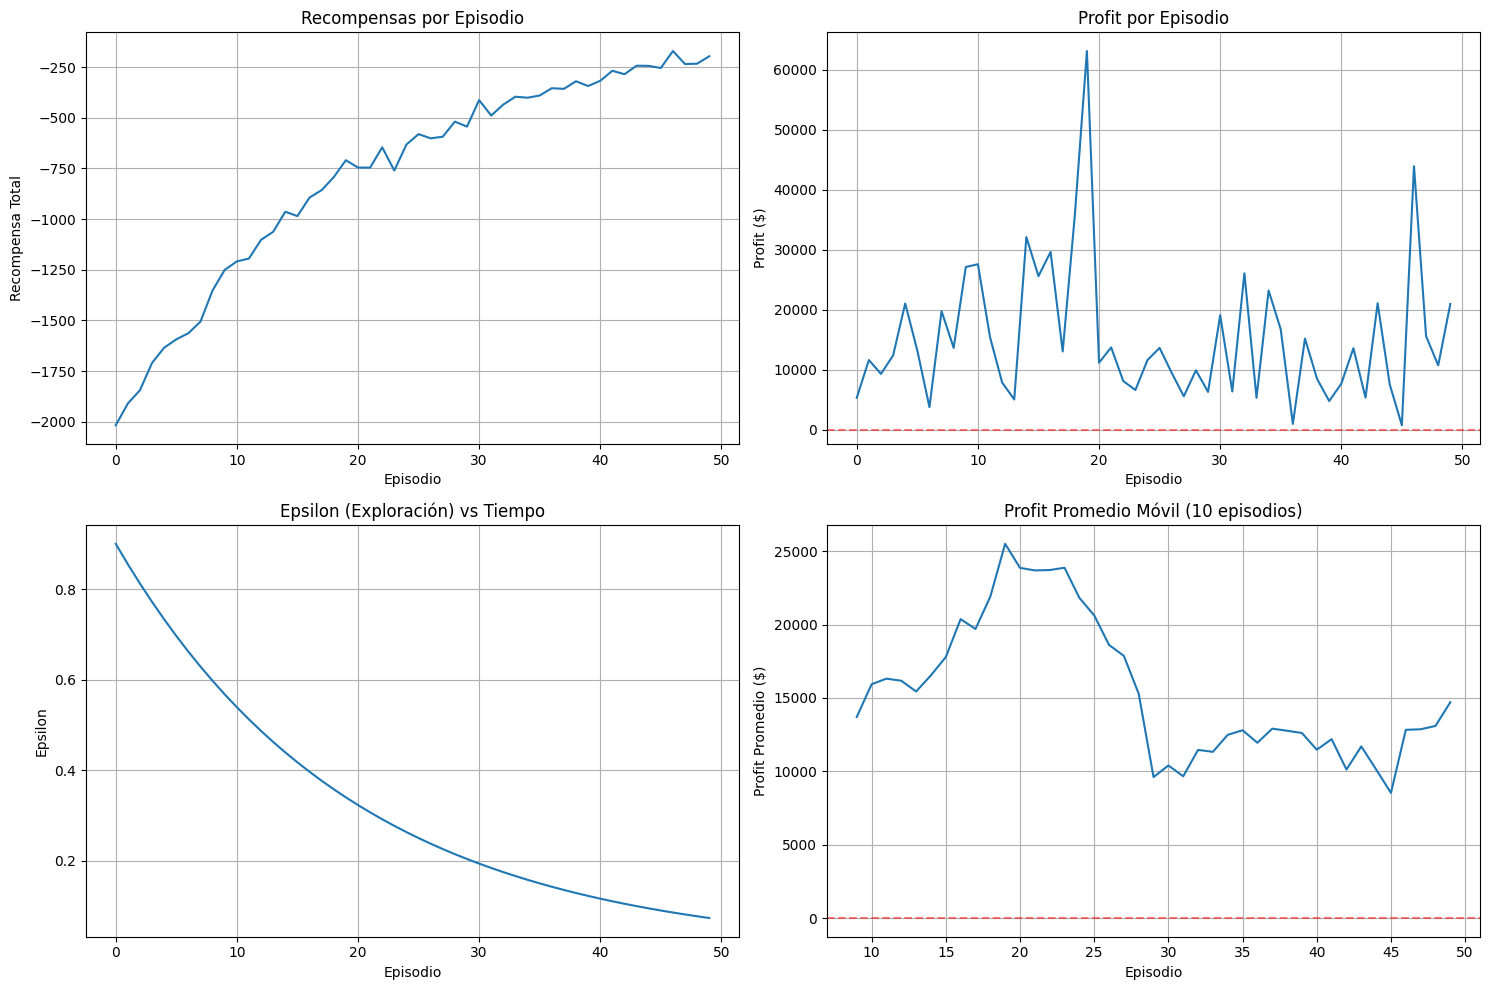


=== EVALUACIÓN DEL AGENTE ===
Capital inicial: $10,000
Capital final: $10000.00
Retorno total: 0.00%
Valor máximo: $10000.00
Valor mínimo: $10000.00
Buy & Hold: 456.27%
Outperformance: -456.27%

Acciones tomadas:
  HOLD: 6841 (100.0%)
  BUY:  0 (0.0%)
  SELL: 0 (0.0%)


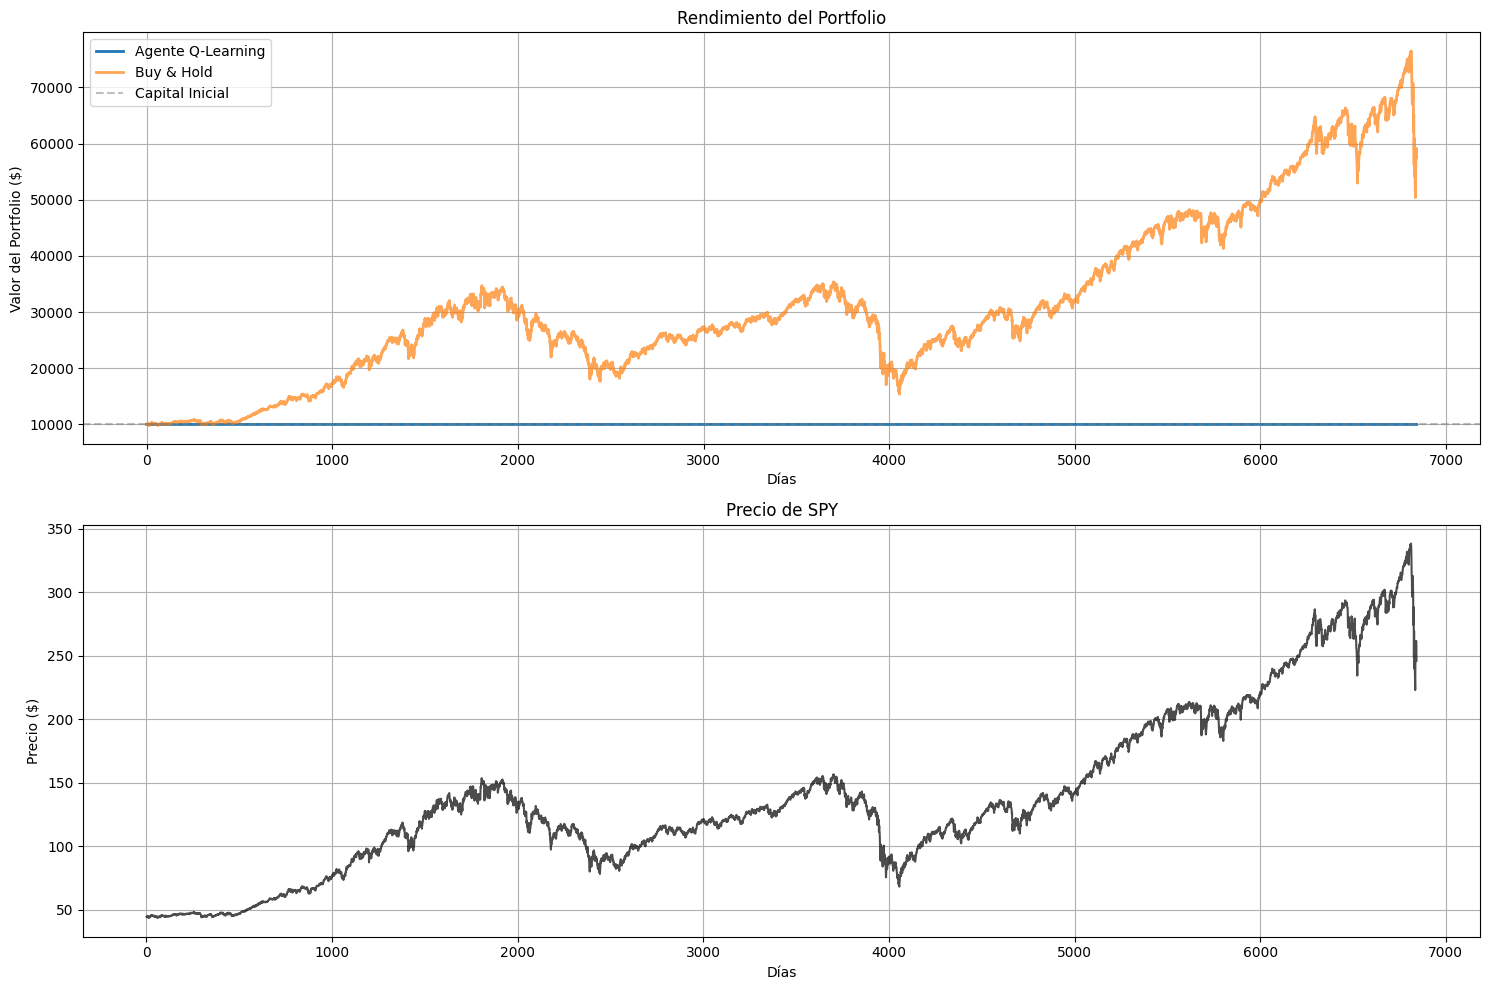


=== Q-TABLE APRENDIDA ===
Estados: 0-2=Bajista, 3-5=Lateral, 6-8=Alcista
Volumen: 0=Bajo, 1=Medio, 2=Alto
Acciones: 0=HOLD, 1=BUY, 2=SELL

Estado 0 (Bajista + Bajo ): HOLD= -0.09, BUY= -0.47, SELL= -0.38 → Mejor: HOLD
Estado 1 (Bajista + Medio): HOLD= -0.01, BUY= -0.71, SELL= -0.28 → Mejor: HOLD
Estado 2 (Bajista + Alto ): HOLD= -0.03, BUY= -0.57, SELL= -2.33 → Mejor: HOLD
Estado 3 (Lateral + Bajo ): HOLD= -0.07, BUY= -0.42, SELL= -0.13 → Mejor: HOLD
Estado 4 (Lateral + Medio): HOLD= -0.03, BUY= -0.67, SELL= -0.15 → Mejor: HOLD
Estado 5 (Lateral + Alto ): HOLD= -0.03, BUY= -0.68, SELL= -0.57 → Mejor: HOLD
Estado 6 (Alcista + Bajo ): HOLD= -0.08, BUY= -0.56, SELL= -0.24 → Mejor: HOLD
Estado 7 (Alcista + Medio): HOLD= -0.04, BUY= -0.46, SELL= -0.26 → Mejor: HOLD
Estado 8 (Alcista + Alto ): HOLD= -0.04, BUY= -0.54, SELL= -1.36 → Mejor: HOLD


In [21]:
# EJECUTAR EL ENTRENAMIENTO
print("=== PREPARANDO ENTRENAMIENTO ===")

# Crear nuevo agente
agent = TradingAgent(learning_rate=0.1, epsilon=0.9, gamma=0.95)

# Entrenar el agente
episode_rewards, episode_profits, epsilon_history = train_agent(
    agent,
    df_etf_spy,
    n_episodes=50,  # empezar con pocos episodios para testing
    decay_rate=0.95
)

# Visualizar resultados del entrenamiento
plot_training_results(episode_rewards, episode_profits, epsilon_history)

# Evaluar agente entrenado
print("\n" + "="*60)
results = evaluate_agent(agent, df_etf_spy)

# Visualizar rendimiento del portfolio
plot_portfolio_performance(results, df_etf_spy)

# Mostrar Q-table aprendida
print(f"\n=== Q-TABLE APRENDIDA ===")
print("Estados: 0-2=Bajista, 3-5=Lateral, 6-8=Alcista")
print("Volumen: 0=Bajo, 1=Medio, 2=Alto")
print("Acciones: 0=HOLD, 1=BUY, 2=SELL")
print()

for state in range(9):
    q_values = agent.q_table[state]
    best_action = np.argmax(q_values)
    action_names = ["HOLD", "BUY", "SELL"]

    print(f"Estado {state} ({decode_state(state):15s}): "
          f"HOLD={q_values[0]:6.2f}, BUY={q_values[1]:6.2f}, SELL={q_values[2]:6.2f} "
          f"→ Mejor: {action_names[best_action]}")

# Supervised Learning: predict market value

Target: next day market trend

+1 (alza): el precio mañana es significativamente mayor al del cierre de hoy

0 (neutral): cambio pequeño, entre -1% y 1%

-1 (baja): menos de -1%

En el dataset no existe este target => feature engineering

\
y_t = \begin{cases}
+1 & \text{if } \displaystyle \frac{Close_{t+1} - Close_t}{Close_t} > 0.01 \\[6pt]
0 & \text{if } -0.01 \leq \displaystyle \frac{Close_{t+1} - Close_t}{Close_t} \leq 0.01 \\[6pt]
-1 & \text{if } \displaystyle \frac{Close_{t+1} - Close_t}{Close_t} < -0.01
\end{cases}



## Raw columns

In [22]:
# FEATURE MATRIX
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = df_etf_spy[features].copy()

# TARGET VARIABLE
price_change = df_etf_spy['Close'].shift(-1) - df_etf_spy['Close']
price_change = price_change / df_etf_spy['Close']

#y = np.where(price_change > 0.01, 1, 0)
#y = np.where(price_change < -0.01, -1, y)
y = (
    price_change
    .apply(lambda x: 1 if x > 0.01 else (-1 if x < -0.01 else 0))
)

# drop last row due to NaN in shift(-1)
X = X.iloc[:-1]
y = y.iloc[:-1]

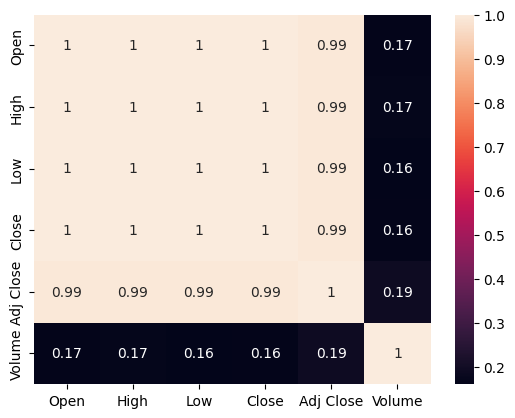

In [23]:
import seaborn as sns

# CORRELATION MATRIX
corrMatrix = X.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Logistic regression

In [24]:
# LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_softmax.fit(X_train_scaled, y_train)

y_pred_softmax = lr_softmax.predict(X_test_scaled)

lr_saga = LogisticRegression(multi_class='multinomial', solver='saga')  # also softmax
lr_saga.fit(X_train_scaled, y_train)

y_pred_saga = lr_saga.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("SOFTMAX:")
y_pred_softmax = lr_softmax.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_softmax))
print()
print("SAGA:")
y_pred_saga = lr_saga.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_saga))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_saga))

SOFTMAX:
Test Accuracy: 0.7552958363769174

Classification Report:
               precision    recall  f1-score   support

          -1       0.38      0.03      0.06       156
           0       0.76      1.00      0.86      1032
           1       0.25      0.01      0.01       181

    accuracy                           0.76      1369
   macro avg       0.46      0.34      0.31      1369
weighted avg       0.65      0.76      0.66      1369


SAGA:
Test Accuracy: 0.7552958363769174

Classification Report:
               precision    recall  f1-score   support

          -1       0.38      0.03      0.06       156
           0       0.76      1.00      0.86      1032
           1       0.25      0.01      0.01       181

    accuracy                           0.76      1369
   macro avg       0.46      0.34      0.31      1369
weighted avg       0.65      0.76      0.66      1369



In [26]:
lr_softmax = LogisticRegression(C=0.3, multi_class='multinomial', solver='lbfgs')
lr_softmax.fit(X_train_scaled, y_train)

y_pred_softmax = lr_softmax.predict(X_test_scaled)

y_pred_softmax = lr_softmax.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_softmax))

conf_matrix_lr_1 = confusion_matrix(y_test, y_pred_softmax)
print("Confusion matrix:\n", conf_matrix_lr_1)


Test Accuracy: 0.7545653761869978

Classification Report:
               precision    recall  f1-score   support

          -1       0.36      0.03      0.06       156
           0       0.76      1.00      0.86      1032
           1       0.00      0.00      0.00       181

    accuracy                           0.75      1369
   macro avg       0.37      0.34      0.31      1369
weighted avg       0.61      0.75      0.66      1369

Confusion matrix:
 [[   5  150    1]
 [   4 1028    0]
 [   5  176    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


clase -1: 5 ok, 150 como neutral, 1 como alza =Z solamente 5/156 ok.

clase 0: 4 como -1, 1028 como 0, 0 como 1 => anduvo bien

clase 1: 5 como -1, 176 como 0, 0 como 1 => no le emboco a ninguno

In [27]:
print(y.value_counts())
print("%\n", y.value_counts(normalize=True) * 100)


Close
 0    5057
 1     920
-1     865
Name: count, dtype: int64
%
 Close
 0    73.911137
 1    13.446361
-1    12.642502
Name: proportion, dtype: float64


Class imbalance -> 1 y -1 tienen menos del 15% de los datos y 0 tiene mas del 70%

In [28]:
lr_softmax = LogisticRegression(C=0.3, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
lr_softmax.fit(X_train_scaled, y_train)

y_pred_softmax = lr_softmax.predict(X_test_scaled)

y_pred_softmax = lr_softmax.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_softmax))
conf_matrix_lr_2 = confusion_matrix(y_test, y_pred_softmax)
print("Confusion matrix lr1:\n", conf_matrix_lr_1)
print("Confusion matrix lr2:\n", conf_matrix_lr_2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy: 0.5434623813002192

Classification Report:
               precision    recall  f1-score   support

          -1       0.17      0.46      0.25       156
           0       0.84      0.60      0.70      1032
           1       0.24      0.27      0.25       181

    accuracy                           0.54      1369
   macro avg       0.41      0.44      0.40      1369
weighted avg       0.68      0.54      0.59      1369

Confusion matrix lr1:
 [[   5  150    1]
 [   4 1028    0]
 [   5  176    0]]
Confusion matrix lr2:
 [[ 71  55  30]
 [279 624 129]
 [ 65  67  49]]


In [29]:
lr_softmax = LogisticRegression(C=0.001, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
lr_softmax.fit(X_train_scaled, y_train)

y_pred_softmax = lr_softmax.predict(X_test_scaled)

y_pred_softmax = lr_softmax.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_softmax))
conf_matrix_lr_3 = confusion_matrix(y_test, y_pred_softmax)
print("Confusion matrix lr1:\n", conf_matrix_lr_1)
print("Confusion matrix lr2:\n", conf_matrix_lr_2)
print("Confusion matrix lr3:\n", conf_matrix_lr_3)

Test Accuracy: 0.508400292184076

Classification Report:
               precision    recall  f1-score   support

          -1       0.19      0.35      0.24       156
           0       0.79      0.59      0.68      1032
           1       0.11      0.18      0.13       181

    accuracy                           0.51      1369
   macro avg       0.36      0.37      0.35      1369
weighted avg       0.63      0.51      0.55      1369

Confusion matrix lr1:
 [[   5  150    1]
 [   4 1028    0]
 [   5  176    0]]
Confusion matrix lr2:
 [[ 71  55  30]
 [279 624 129]
 [ 65  67  49]]
Confusion matrix lr3:
 [[ 54  72  30]
 [177 609 246]
 [ 58  90  33]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy ahora es peor pero esto se debe a que el modelo ahora presta atención a todas las clases y para eso tiene que "prestarle menos atención" a la clase mayoritaria, que era la del 0.

De la matriz de confusion vemos que mejoro con respecto a la primera vuelta pero no con respecto a la segunda.

### Random forest

In [30]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [31]:
# Metrics for Random Forest
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en test (Random Forest): {acc_test_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix rf:\n", conf_matrix_rf)

Accuracy en test (Random Forest): 0.7115

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.23      0.14      0.18       156
           0       0.78      0.91      0.84      1032
           1       0.21      0.09      0.12       181

    accuracy                           0.71      1369
   macro avg       0.41      0.38      0.38      1369
weighted avg       0.64      0.71      0.67      1369

Confusion matrix rf:
 [[ 22 117  17]
 [ 53 936  43]
 [ 19 146  16]]


In [32]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

# Metrics for Random Forest
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en test (Random Forest): {acc_test_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix rf:\n", conf_matrix_rf)
print("Confusion matrix rf:\n", conf_matrix_rf2)

Accuracy en test (Random Forest): 0.7180

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.21      0.10      0.14       156
           0       0.78      0.92      0.84      1032
           1       0.26      0.11      0.16       181

    accuracy                           0.72      1369
   macro avg       0.42      0.38      0.38      1369
weighted avg       0.65      0.72      0.67      1369

Confusion matrix rf:
 [[ 22 117  17]
 [ 53 936  43]
 [ 19 146  16]]
Confusion matrix rf:
 [[ 16 124  16]
 [ 45 947  40]
 [ 17 144  20]]


In [33]:
# try to reduce overfitting to the main class due to class imbalance
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=5)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

# Metrics for Random Forest
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en test (Random Forest): {acc_test_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix rf:\n", conf_matrix_rf)

Accuracy en test (Random Forest): 0.7553

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.36      0.03      0.05       156
           0       0.76      0.99      0.86      1032
           1       0.45      0.03      0.05       181

    accuracy                           0.76      1369
   macro avg       0.53      0.35      0.32      1369
weighted avg       0.68      0.76      0.66      1369

Confusion matrix rf:
 [[   4  149    3]
 [   4 1025    3]
 [   3  173    5]]


## Feature engineering

La información que tenemos en las columnas del dataset no dan una buena información a lo largo del tiempo y nosotros queremos predecir que va a pasar mañana.

Por ejemplo, solo con el precio no tengo mucha información pero si calculo "daily return" como (precio hoy - precio ayer ) / precio ayer, voy a tener una mejor idea de como cambió el precio.

Algunas features que se usan habitualmente en financial ML:

* daily return -> captures momentum
* 5-day moving average (MA5)
* 10-day moving average (MA10)
* price-to-moving-average ratios -> measures how stretched price is
* rolling volatility (5-day STD) -> captures uncertainty
* volume ratio to 5-day average
* high-low price range

In [34]:
# Daily return
# r_t = (Close_t - Close_{t-1}) / Close_{t-1}

df_etf_spy['daily_return'] = (df_etf_spy['Close'] - df_etf_spy['Close'].shift(1)) / df_etf_spy['Close'].shift(1)

df_etf_spy.dropna(subset=['daily_return'], inplace=True)  # first row will be NaN after shifting

df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500,0.007112
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300,0.002119
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400,0.010571
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500,0.004184
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.916538,492100,-0.000694


In [35]:
# MA5
# (1/5)*sum0_4[close(t-1)]

df_etf_spy['MA5'] = df_etf_spy['Close'].rolling(window=5).mean()

df_etf_spy.dropna(subset=['MA5'], inplace=True) # first 4 rows are Nan after shifting

df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5
5,1993-02-05,44.96875,45.0625,44.71875,44.96875,26.916538,492100,-0.000694,44.67500
6,1993-02-08,44.96875,45.1250,44.90625,44.96875,26.916538,596100,0.000000,44.81875
7,1993-02-09,44.81250,44.8125,44.56250,44.65625,26.729490,122100,-0.006949,44.88125
8,1993-02-10,44.65625,44.7500,44.53125,44.71875,26.766899,379600,0.001400,44.86250
9,1993-02-11,44.78125,45.1250,44.78125,44.93750,26.897835,19500,0.004892,44.85000


In [36]:
# MA10

df_etf_spy['MA10'] = df_etf_spy['Close'].rolling(window=10).mean()

df_etf_spy.dropna(subset=['MA10'], inplace=True) # first 9 rows are Nan after shifting

df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5,MA10
14,1993-02-19,43.40625,43.56250,43.34375,43.56250,26.074812,34900,0.003600,43.69375,44.271875
15,1993-02-22,43.68750,43.78125,43.56250,43.71875,26.168346,513600,0.003587,43.51875,44.146875
16,1993-02-23,43.84375,43.87500,43.46875,43.68750,26.149637,373700,-0.000715,43.56250,44.018750
17,1993-02-24,43.71875,44.25000,43.71875,44.25000,26.486324,26300,0.012876,43.72500,43.978125
18,1993-02-25,44.21875,44.37500,44.12500,44.34375,26.542448,44500,0.002119,43.91250,43.940625


In [37]:
# Price-to-moving-average ratios

df_etf_spy['PR5'] = df_etf_spy['Close']/df_etf_spy['MA5']
df_etf_spy['PR10'] = df_etf_spy['Close']/df_etf_spy['MA10']

df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5,MA10,PR5,PR10
14,1993-02-19,43.40625,43.56250,43.34375,43.56250,26.074812,34900,0.003600,43.69375,44.271875,0.996996,0.983977
15,1993-02-22,43.68750,43.78125,43.56250,43.71875,26.168346,513600,0.003587,43.51875,44.146875,1.004596,0.990302
16,1993-02-23,43.84375,43.87500,43.46875,43.68750,26.149637,373700,-0.000715,43.56250,44.018750,1.002869,0.992475
17,1993-02-24,43.71875,44.25000,43.71875,44.25000,26.486324,26300,0.012876,43.72500,43.978125,1.012007,1.006182
18,1993-02-25,44.21875,44.37500,44.12500,44.34375,26.542448,44500,0.002119,43.91250,43.940625,1.009821,1.009174


In [38]:
# Rolling volatility
# std(close t-4, close t-3, ..., close t)

df_etf_spy['volatility'] = df_etf_spy['daily_return'].rolling(window=5).std()
df_etf_spy.dropna(subset=['volatility'], inplace=True)
df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5,MA10,PR5,PR10,volatility
18,1993-02-25,44.21875,44.37500,44.12500,44.34375,26.542448,44500,0.002119,43.91250,43.940625,1.009821,1.009174,0.005110
19,1993-02-26,44.43750,44.43750,44.18750,44.40625,26.579865,66200,0.001409,44.08125,43.887500,1.007373,1.011820,0.005275
20,1993-03-01,44.56250,44.56250,44.21875,44.28125,26.505026,66500,-0.002815,44.19375,43.856250,1.001980,1.009691,0.006073
21,1993-03-02,44.31250,44.93750,44.25000,44.93750,26.897835,182400,0.014820,44.44375,44.003125,1.011110,1.021234,0.007720
22,1993-03-03,45.00000,45.15625,44.93750,45.12500,27.010061,280100,0.004172,44.61875,44.171875,1.011346,1.021578,0.006591


In [39]:
# Volume ratio to 5-day average
# volume(t) / mean volume (t)

df_etf_spy['volume_ratio'] = df_etf_spy['Volume'] / df_etf_spy['Volume'].rolling(window=5).mean()
df_etf_spy.dropna(subset=['volume_ratio'], inplace=True)
df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5,MA10,PR5,PR10,volatility,volume_ratio
22,1993-03-03,45.00000,45.15625,44.93750,45.12500,27.010061,280100,0.004172,44.61875,44.171875,1.011346,1.021578,0.006591,2.189307
23,1993-03-04,45.18750,45.18750,44.87500,44.87500,26.860428,89500,-0.005540,44.72500,44.318750,1.003354,1.012551,0.007884,0.653571
24,1993-03-05,44.93750,45.12500,44.71875,44.75000,26.785612,40000,-0.002786,44.79375,44.437500,0.999023,1.007032,0.008232,0.303721
25,1993-03-08,44.84375,45.75000,44.84375,45.75000,27.384171,50800,0.022346,45.08750,44.640625,1.014694,1.024851,0.011799,0.395146
26,1993-03-09,45.65625,45.68750,45.50000,45.59375,27.290640,169300,-0.003415,45.21875,44.831250,1.008293,1.017008,0.011437,1.344291


In [40]:
# High-Low price range
# high(t) - low(t)

df_etf_spy['price_range'] = df_etf_spy['High'] - df_etf_spy['Low']
df_etf_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return,MA5,MA10,PR5,PR10,volatility,volume_ratio,price_range
22,1993-03-03,45.00000,45.15625,44.93750,45.12500,27.010061,280100,0.004172,44.61875,44.171875,1.011346,1.021578,0.006591,2.189307,0.21875
23,1993-03-04,45.18750,45.18750,44.87500,44.87500,26.860428,89500,-0.005540,44.72500,44.318750,1.003354,1.012551,0.007884,0.653571,0.31250
24,1993-03-05,44.93750,45.12500,44.71875,44.75000,26.785612,40000,-0.002786,44.79375,44.437500,0.999023,1.007032,0.008232,0.303721,0.40625
25,1993-03-08,44.84375,45.75000,44.84375,45.75000,27.384171,50800,0.022346,45.08750,44.640625,1.014694,1.024851,0.011799,0.395146,0.90625
26,1993-03-09,45.65625,45.68750,45.50000,45.59375,27.290640,169300,-0.003415,45.21875,44.831250,1.008293,1.017008,0.011437,1.344291,0.18750


Vamos a predecir la dirección del mercado para el día siguiente => target = daily_return

Mapeamos a -1, 0, 1 para mantener los 3 estados que maneja el agente.

In [41]:
features = ['MA5','MA10','PR5','PR10','volatility','volume_ratio','price_range']
X = df_etf_spy[features].copy()
y = df_etf_spy['daily_return'].apply(
    lambda x: 1 if x > 0.01 else (-1 if x < -0.01 else 0)
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Logistic regression

In [42]:
lr_softmax_eng = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_softmax_eng.fit(X_train_scaled, y_train)

y_pred_softmax_eng = lr_softmax_eng.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [43]:
print("Logistic regression:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_softmax_eng))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_softmax_eng))

Logistic regression:
Test Accuracy: 0.8747252747252747

Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.64      0.68       125
           0       0.90      0.96      0.93      1100
           1       0.72      0.41      0.53       140

    accuracy                           0.87      1365
   macro avg       0.78      0.67      0.71      1365
weighted avg       0.87      0.87      0.86      1365



### Random forest

In [44]:
rf_eng = RandomForestClassifier(n_estimators=100, random_state=42)
rf_eng.fit(X_train_scaled, y_train)

y_pred_rf_eng = rf_eng.predict(X_test_scaled)

In [45]:
# Metrics for Random Forest
acc_test_rf = accuracy_score(y_test, y_pred_rf_eng)
print(f"Accuracy en test (Random Forest): {acc_test_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
class_report_rf_eng = classification_report(y_test, y_pred_rf_eng)
print(class_report_rf_eng)

conf_matrix_rf_eng = confusion_matrix(y_test, y_pred_rf_eng)
print("Confusion matrix rf:\n", conf_matrix_rf_eng)

Accuracy en test (Random Forest): 0.8740

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.69      0.79      0.74       125
           0       0.93      0.92      0.93      1100
           1       0.60      0.61      0.60       140

    accuracy                           0.87      1365
   macro avg       0.74      0.77      0.76      1365
weighted avg       0.88      0.87      0.88      1365

Confusion matrix rf:
 [[  99   20    6]
 [  41 1009   50]
 [   4   51   85]]


In [46]:
rf_eng = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_eng.fit(X_train_scaled, y_train)

y_pred_rf_eng = rf_eng.predict(X_test_scaled)

# Metrics for Random Forest
acc_test_rf_eng = accuracy_score(y_test, y_pred_rf_eng)
print(f"Accuracy en test (Random Forest): {acc_test_rf_eng:.4f}\n")

print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf_eng))

conf_matrix_rf_eng = confusion_matrix(y_test, y_pred_rf_eng)
print("Confusion matrix rf:\n", conf_matrix_rf_eng)


Accuracy en test (Random Forest): 0.8711

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.68      0.80      0.74       125
           0       0.94      0.91      0.92      1100
           1       0.58      0.64      0.61       140

    accuracy                           0.87      1365
   macro avg       0.73      0.78      0.76      1365
weighted avg       0.88      0.87      0.87      1365

Confusion matrix rf:
 [[ 100   19    6]
 [  41 1000   59]
 [   5   46   89]]


Probé n_estimator 100 y 1000 y tambien varios valores de max_depth pero no logro acc mayor a 87% y la matriz de confusión muestra bastantes casos mal clasificados.

Pruebo XGBoost, que construye los arboles secuencialmente corrigiendo los errores de las iteraciones anteriores. Además incluye regularización y esto disminuue las chances de overfitting.

### Random Forest + time-aware train/test splitting

---



El problema de predecir el valor del SPY mañana entra dentro de la categoría de time series problems.

Hay una técnica de cross-validation para time series que vamos a usar en combinación con Random Forest para ver si obtenemos mejores resultados. La diferencia con respecto al cross-validation que se usa habitualmente, es que acá hay que mantener la "dirección" de los datos en función del tiempo porque hay que aprender del pasado para predecir el futuro.

Entonces, para hacer la división en test, val y train:

1. Respetar orden cronológico de los datos. Training set tiene que pasar ANTES de validation set, que va a pasar ANTES del test set.

2. No elegir el test set de forma arbitraria, tiene que moverse a lo largo del tiempo.

![ Alt Text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*F9KDzj1JqNAencfNxuuyJg.png)

https://medium.com/elca-it/an-overview-of-time-aware-cross-validation-techniques-779a68bf386c



In [47]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1) Prepare your features X and target y (aligned and sorted by time)
#    X: shape (n_samples, n_features); y: shape (n_samples,)
X = df_etf_spy[features].copy()
y = df_etf_spy['daily_return'].apply(
    lambda x: 1 if x > 0.01 else (-1 if x < -0.01 else 0)
)

# 2) Configure TimeSeriesSplit
#    n_splits: number of folds
#    max_train_size: optional cap on training window size
#    test_size: size of each validation window
tscv = TimeSeriesSplit(
    n_splits=5,
    max_train_size=None,  # use all available history up to each split
    test_size=100          # e.g., validate on 100 time steps per fold
)

errors = []
for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]

    # 3) Fit your model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 4) Evaluate on the validation fold
    preds = model.predict(X_val)
    err = mean_absolute_error(y_val, preds)
    errors.append(err)
    print(f"Fold {fold+1} MAE: {err:.4f}")

print(f"Average MAE: {np.mean(errors):.4f}")


Fold 1 MAE: 0.1530
Fold 2 MAE: 0.3278
Fold 3 MAE: 0.1853
Fold 4 MAE: 0.1986
Fold 5 MAE: 0.2363
Average MAE: 0.2202


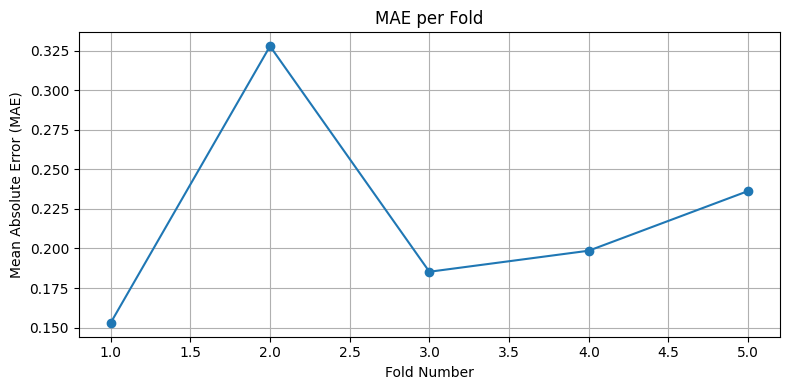

In [48]:
folds = list(range(1, len(errors) + 1))

plt.figure(figsize=(8, 4))
plt.plot(folds, errors, marker='o', linestyle='-')
plt.title('MAE per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Grid search para sacar los mejores hyperparameters del cross validation

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1) Build a pipeline: scaler + RF
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# 2) Time-series cross-validator
tscv = TimeSeriesSplit(n_splits=5, test_size=100)

# 3) Hyperparameter grid
param_grid = {
    'clf__n_estimators':       [50, 100, 200],
    'clf__max_depth':          [None, 10, 20],
    'clf__min_samples_split':  [2, 5]
}

# 4) Configure and run GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

# 5) View best results
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1-macro:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best F1-macro: 0.7022580027900553


In [57]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=2))
])
pipeline.fit(X_train, y_train)

y_pred = rf.predict(X_test_scaled)

# Metrics for Random Forest
acc_test = accuracy_score(y_test, y_pred)
print(f"Accuracy en test (Random Forest): {acc_test:.4f}\n")

print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix rf:\n", conf_matrix)

Accuracy en test (Random Forest): 0.5949

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

          -1       0.20      0.97      0.33       125
           0       0.94      0.60      0.74      1100
           1       0.61      0.19      0.29       140

    accuracy                           0.59      1365
   macro avg       0.58      0.59      0.45      1365
weighted avg       0.84      0.59      0.65      1365

Confusion matrix rf:
 [[121   3   1]
 [420 664  16]
 [ 74  39  27]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Integrate predictions with agent

For a scikit-learn model:

- joblib.dump(): captures learned parameters and hyperparameters of the model
- joblib.load(): restores the exact model state so we can call predict without retraining

In [58]:
# save trained model and pipeline

import joblib

joblib.dump(rf, 'rf_model.pkl')
joblib.dump(pipeline, 'rf_pipeline.pkl')

['rf_pipeline.pkl']

In [59]:
# load model ONCE

ml_model = joblib.load('rf_model.pkl')

In [60]:
# features = ['MA5','MA10','PR5','PR10','volatility','volume_ratio','price_range']

def extract_features(row_window):
    """
    row_window: DataFrame slice of the last N days including today,
                with columns ['Close','Volume','MA5','MA10',...].
    Returns a (1, n_features) numpy array.
    """
    today = row_window.iloc[-1]
    ma5 = today['MA5']
    ma10 = today['MA10']
    pr5 = today['PR5']
    pr10 = today['PR10']
    volatility = today['volatility']
    volume_ratio = today['volume_ratio']
    price_range = today['price_range']

    return np.array([[ma5, ma10, pr5, pr10, volatility, volume_ratio, price_range]])

In [68]:
ml_pipeline = joblib.load('rf_pipeline.pkl')

class TradingAgent2:
    def __init__(self, n_states=9, n_actions=3, learning_rate=0.1, epsilon=0.9, gamma=0.95):
        self.n_states = n_states
        self.n_actions = n_actions
        self.lr = learning_rate  # qué tan rápido aprende
        self.epsilon = epsilon   # probabilidad de exploración (90% inicial)
        self.gamma = gamma       # factor de descuento (importancia del futuro)
        self.ml_pipeline = ml_pipeline

        # Q-table: la "memoria" del agente
        self.q_table = np.zeros((n_states, n_actions))

        # Estado del portafolio
        self.cash = 1000         # dinero inicial
        self.position = 0        # número de acciones que tengo
        self.buy_price = 0       # precio al que compré

        # ADD ML MODEL
        self.ml_model = joblib.load('rf_model.pkl')

    def choose_action(self, state):
        """Estrategia epsilon-greedy: explorar vs explotar"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)  # EXPLORAR: acción aleatoria
        else:
            return np.argmax(self.q_table[state])    # EXPLOTAR: mejor acción conocida

        # Q-Learning action
        return super().choose_action(state)

    def choose_action_ml(self, state, history_df):
        # ML-based action
        feature_vector = extract_features(history_df.tail(10))  # pass last window
        feature_cols = ['MA5','MA10','PR5','PR10','volatility','volume_ratio','price_range']
        feat_df = pd.DataFrame(feature_vector, columns=feature_cols)
        ml_pred = self.ml_pipeline.predict(feat_df)[0]

        # map prediction (-1,0,1) to action indices
        action_map = { -1: 2, 0: 0, 1: 1} # 2: sell, 0: hold, 1: buy

        # Combine or choose strategy
        return action_map.get(ml_pred, self.choose_action(state))

Actualizar evaluate_agent para que use el nuevo choose_action

In [69]:
def evaluate_agent(agent, df, window=10, verbose=True):
    """
    Evalúa el rendimiento del agente entrenado sin exploración (epsilon=0).
    """

    # Guardar epsilon original y ponerlo a 0 (sin exploración)
    original_epsilon = agent.epsilon
    agent.epsilon = 0

    # Resetear agente
    agent.cash = 10000
    agent.position = 0
    agent.buy_price = 0

    portfolio_values = [10000]  # valor inicial
    actions_taken = []
    trades = []  # registro de operaciones

    for day in range(1, len(df) - 1):
        current_close = df.iloc[day]['Close']
        current_volume = df.iloc[day]['Volume']
        previous_close = df.iloc[day-1]['Close']
        next_close = df.iloc[day+1]['Close']

        history_df = df.iloc[max(0, day-window+1): day+1]  # últimas 'window' filas

        # Estado y acción
        current_state = create_state_from_data(current_close, current_volume, previous_close)
        action = agent.choose_action_ml(current_state, history_df)  # epsilon=0, solo explotación
        actions_taken.append(action)

        # Ejecutar acción
        reward, action_result = calculate_reward(agent, action, current_close, next_close)

        # Registrar trades importantes
        if action == 1 and agent.position > 0:  # BUY exitoso
            trades.append(f"Día {day}: COMPRA a ${current_close:.2f}")
        elif action == 2 and agent.position == 0:  # SELL exitoso
            trades.append(f"Día {day}: VENTA a ${current_close:.2f}")

        # Calcular valor del portfolio
        portfolio_value = agent.cash + (agent.position * current_close)
        portfolio_values.append(portfolio_value)

    # Restaurar epsilon original
    agent.epsilon = original_epsilon

    # Métricas finales
    final_value = portfolio_values[-1]
    total_return = (final_value - 10000) / 10000 * 100
    max_value = max(portfolio_values)
    min_value = min(portfolio_values)

    # Buy & Hold benchmark
    buy_hold_return = (df.iloc[-1]['Close'] - df.iloc[1]['Close']) / df.iloc[1]['Close'] * 100

    if verbose:
        print(f"=== EVALUACIÓN DEL AGENTE ===")
        print(f"Capital inicial: $10,000")
        print(f"Capital final: ${final_value:.2f}")
        print(f"Retorno total: {total_return:.2f}%")
        print(f"Valor máximo: ${max_value:.2f}")
        print(f"Valor mínimo: ${min_value:.2f}")
        print(f"Buy & Hold: {buy_hold_return:.2f}%")
        print(f"Outperformance: {total_return - buy_hold_return:.2f}%")
        print(f"\nAcciones tomadas:")
        action_counts = [actions_taken.count(i) for i in range(3)]
        print(f"  HOLD: {action_counts[0]} ({action_counts[0]/len(actions_taken)*100:.1f}%)")
        print(f"  BUY:  {action_counts[1]} ({action_counts[1]/len(actions_taken)*100:.1f}%)")
        print(f"  SELL: {action_counts[2]} ({action_counts[2]/len(actions_taken)*100:.1f}%)")

        if trades:
            print(f"\nOperaciones principales:")
            for trade in trades[-5:]:  # últimas 5 operaciones
                print(f"  {trade}")

    return {
        'final_value': final_value,
        'total_return': total_return,
        'buy_hold_return': buy_hold_return,
        'portfolio_values': portfolio_values,
        'actions': actions_taken,
        'trades': trades
    }

Aca hay dos opciones:

1. usar el agente que ya fue entrenado, que ya habia generado su q-table y que simplemente agregue la opcion de usar el modelo. En este caso el agente se va a basar en las predicciones del modelo y si no tiene buenos resultados va a mirar la q-table que genero mas arriba cuando creamos el agente, no se va a actualizar la tabla.

2. entrenarlo devuelta para que considere las predicciones del modelo y actualice su q-table en base a eso.

## Opcion 1: no reentrenar el agente, mantener q-table original

In [70]:
agent_opc1 = TradingAgent2(learning_rate=0.1, epsilon=0.0, gamma=0.95)  # epsilon 0 para que no explore, solo evalua
result_opc1 = evaluate_agent(agent_opc1, df_etf_spy)

=== EVALUACIÓN DEL AGENTE ===
Capital inicial: $10,000
Capital final: $10491.45
Retorno total: 4.91%
Valor máximo: $17736.06
Valor mínimo: $5853.29
Buy & Hold: 448.52%
Outperformance: -443.61%

Acciones tomadas:
  HOLD: 5337 (78.3%)
  BUY:  715 (10.5%)
  SELL: 767 (11.2%)

Operaciones principales:
  Día 6812: VENTA a $228.80
  Día 6813: VENTA a $222.95
  Día 6814: COMPRA a $243.15
  Día 6815: COMPRA a $246.79
  Día 6818: COMPRA a $261.65


## Opcion 2: reentrenar agente y que ajuste la q-table segun las predicciones del modelo

In [71]:
agent_opc2 = TradingAgent2(learning_rate=0.1, epsilon=0.9, gamma=0.95)

episode_rewards, episode_profits, eps_hist = train_agent(
    agent,
    df_etf_spy,
    n_episodes=50,
    decay_rate=0.95
)

result_opc2 = evaluate_agent(agent_opc2, df_etf_spy)
print(result_opc2)

=== INICIANDO ENTRENAMIENTO ===
Episodios: 50
Datos disponibles: 6821 días
Epsilon inicial: 0.069

Episodio  10 | Epsilon: 0.041 | Reward promedio: -143.29 | Profit promedio: $17138.56 | Acciones: H=6519 B=92 S=208
Episodio  20 | Epsilon: 0.025 | Reward promedio: -104.43 | Profit promedio: $12907.45 | Acciones: H=6615 B=68 S=136
Episodio  30 | Epsilon: 0.015 | Reward promedio: -88.15 | Profit promedio: $10172.06 | Acciones: H=6621 B=43 S=155
Episodio  40 | Epsilon: 0.010 | Reward promedio: -25.93 | Profit promedio: $18357.89 | Acciones: H=6638 B=26 S=155
Episodio  50 | Epsilon: 0.010 | Reward promedio: -32.04 | Profit promedio: $12809.46 | Acciones: H=6706 B=17 S=96

=== ENTRENAMIENTO COMPLETADO ===
Epsilon final: 0.010
Profit promedio últimos 10 episodios: $12809.46
=== EVALUACIÓN DEL AGENTE ===
Capital inicial: $10,000
Capital final: $10491.45
Retorno total: 4.91%
Valor máximo: $17736.06
Valor mínimo: $5853.29
Buy & Hold: 448.52%
Outperformance: -443.61%

Acciones tomadas:
  HOLD: 53